======================== Import Packages ==========================

In [6]:
import sys, os, pdb
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table, join
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import csv

========================== Define Fuctions ==========================

In [7]:
def calc_KME(region, mdust, ddet):

   """
    PURPOSE:    Calculate the KME

    INPUT:      region = region name (str)
                mdust = dust mass; non-detections are 3-sigma upper limits (array of floats)
                ddet = detection flag; 1=detected, 0=undetected (array of floats)

    OUTPUT:     KME output for plotting

    """
   
   dfrac = float(len(ddet[ddet==1]) )/ len(ddet)
   kmf = KaplanMeierFitter()
   kmf.fit(mdust, ddet)
   
   k = kmf.survival_function_
   x = np.array(k.index)
   y = dfrac * np.array(k.values[:,0])
   
   kc = kmf.confidence_interval_
   yu = dfrac * kc.values[:,0]
   yl = dfrac * kc.values[:,1]
   
   print('\n>>> ' + region)
   print('     median = {0:.2f} '.format(dfrac * kmf.median_survival_time_))
   print('     mean   = {0:.2f} '.format(np.trapz(y, x=x)))
   
   return x, y, yu, yl

============================= Code ==================================

In [8]:
#### LOAD IN TABLES 
TL = Table.read('../output/data_lup.txt', format='ascii.ipac')
TT = Table.read('../output/data_tau.txt', format='ascii.ipac')
TU = Table.read('../output/data_usc.txt', format='ascii.ipac')

In [9]:
### GET KME 
x_lup, y_lup, yl_lup, yu_lup = calc_KME('lup', TL['MDust'], TL['Det'])
x_usc, y_usc, yl_usc, yu_usc = calc_KME('usc', TU['MDust'], TU['Det'])
x_tau, y_tau, yl_tau, yu_tau = calc_KME('tau', TT['MDust'], TT['Det'])


>>> lup
     median = 4.14 
     mean   = 14.03 

>>> usc
     median = 0.43 
     mean   = 3.34 

>>> tau
     median = 5.85 
     mean   = 14.99 


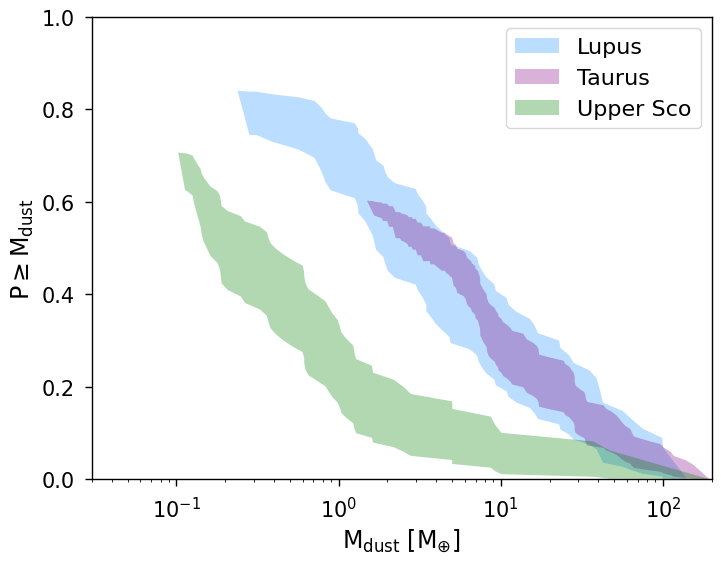

In [10]:
### PLOT KME DISTRIBUTIONS
plt.close('all')
mpl.rc('xtick',labelsize=15) 
mpl.rc('ytick',labelsize=15)
mpl.rc('xtick.major',size=5,pad=7,width=1)
mpl.rc('ytick.major',size=5,pad=7,width=1)
mpl.rc('axes',linewidth=1)
mpl.rc('lines',markersize=5)    
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_xlim(0.03,200)
ax.set_ylim(0.0,1.0)
ax.set_ylabel(r'$\mathregular{P \geq M_{dust}}$',fontsize=17)
ax.set_xlabel(r'$\mathregular{M_{dust}}$'+' '+r'$\mathregular{[M_{\oplus}]}$',fontsize=17)
ax.fill_between(x_lup,yl_lup,yu_lup,facecolor='dodgerblue',alpha=0.3,lw=0,label='Lupus')
ax.fill_between(x_tau,yl_tau,yu_tau,facecolor='purple',alpha=0.3,lw=0,label='Taurus')
ax.fill_between(x_usc,yl_usc,yu_usc,facecolor='green',alpha=0.3,lw=0,label='Upper Sco')
ax.legend(loc=1, prop={'size': 16})
fig.savefig('../output/figure_08.png',bbox_inches='tight',dpi=100)